# **Создание новых признаков**

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Подгрузим данные.

In [46]:
df3 = pd.read_csv('EDA_dataset.csv')

Потенциально может быть интересно отсмотреть конкретные метрики активности аудитории. Для этой цели может быть рассчитана метрика Engagement Rate by Views, ER View - соотношение всех целевых активностей аудитории (лайки, репосты, комментарии) к просмотрам. Для этого создадим два признака - сумму всех активностей аудитории (reactions), соотношение активности аудитории к просмотрам (ER). В сумме каждый из видов активности будет иметь вес равный единице, поскольку мы предполагаем, что любая активность со стороны аудитории одинаково ценна.

Мы считаем, что рассмотрение лайков/просмотров/комментариев/репостов в лоб - это недостаточно, поскольку лайки/репосты/комментарии объективно будут как-то зависеть от просмотров, а сами просмотры зачастую будут задаваться стохастически, не завися от каких-то задаваемых нами параметров (*c'est la vie)*. Будем считать просмотры экзогенной переменной, от которой зависит все остальное. Поэтому, чтобы не привязываться к факторам, на которые мы повлиять не в силах, мы будем изучать уровень активности аудитории на ER.

Помимо этого создадим еще признаки, которые будет показывать, сколько всего наград у фильма, и есть ли у фильма хотя бы что-то из двух: Золотая пальмовая ветвь или Золотой глобус

In [47]:
df3['reactions'] = df3['likes'] + df3['reposts'] + df3['comments']
df3['ER'] = df3['reactions'] / df3['views'] * 100

df3['prize'] = df3['oscar_winner'] + df3['palme_winner'] + df3['globe_winner']

df3['other_award'] = df3[['palme_winner', 'globe_winner']].max(axis=1)

df3.head()

,likes,reposts,views,comments,attachments,text,movie,director,year,additional_info,...,globe_winner,movie_flg,log_likes,log_reposts,log_views,log_comments,reactions,ER,prize,other_award
0,46,30,5841,3,9,"«Чернокнижник: Армагеддон», 1993 год. \nРежисс...",Чернокнижник: Армагеддон,Энтони Хикокс,1993,NaN,...,0.0,True,3.850148,3.433987,8.672828,1.386294,79,1.352508,0.0,0.0
1,274,561,31437,3,9,"«Губная помада», 1976 год. \nРежиссер: Ламонт ...",Губная помада,Ламонт Джонсон,1976,"Марго Хемингуэй играет модель Крис, которая у...",...,0.0,True,5.616771,6.331502,10.355773,1.386294,838,2.665649,0.0,0.0
2,114,51,13382,1,9,В главной роли — Роми Шнайдер 📽,NaN,NaN,0,В главной роли — Роми Шнайдер 📽,...,NaN,False,4.744932,3.951244,9.501741,0.693147,166,1.240472,NaN,NaN
3,154,23,13978,1,6,🖤 Маргарет Куолли в объективе Тома Шумахера 🖤,NaN,NaN,0,🖤 Маргарет Куолли в объективе Тома Шумахера 🖤,...,NaN,False,5.043425,3.178054,9.545311,0.693147,178,1.273430,NaN,NaN
4,102,82,13583,3,9,"«Соблазн», 2001 год. \nРежиссер: Майкл Кристофер.",Соблазн,Майкл Кристофер,2001,NaN,...,0.0,True,4.634729,4.418841,9.516648,1.386294,187,1.376721,0.0,0.0


Рассмотрим связь между целевым показателем и остальными переменными с помощью гистограммы рассеивания. Разделим наш датасет на 2 отдельных - movies (где посты посвящены фильмам) и pictures (где посты посвящены не фильмам).

In [48]:
movies = df3[df3['movie_flg']==True]

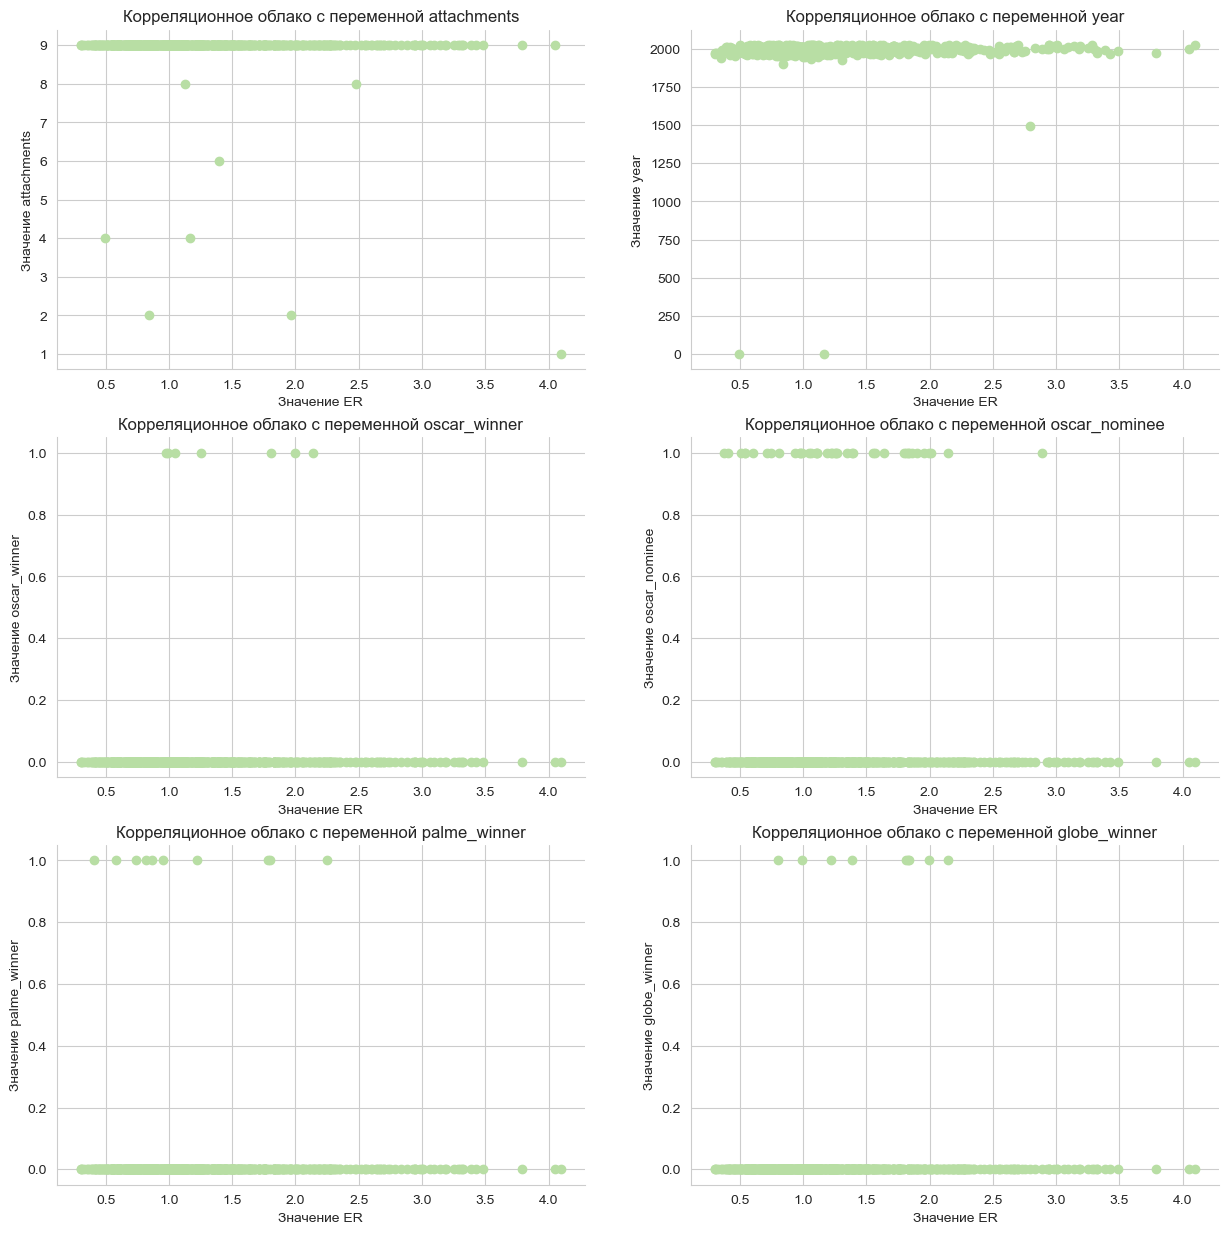

In [49]:
sns.set_style("whitegrid")
plt.subplots(figsize=(15, 15))

plt.subplot(3, 2, 1)
plt.scatter(movies['ER'], movies['attachments'], color = '#b8dea4')
plt.title('Корреляционное облако с переменной attachments')
plt.xlabel('Значение ER')
plt.ylabel(f'Значение attachments')
sns.despine(right=True, top=True)

plt.subplot(3, 2, 2)
plt.scatter(movies['ER'], movies['year'], color = '#b8dea4')
plt.title('Корреляционное облако с переменной year')
plt.xlabel('Значение ER')
plt.ylabel(f'Значение year')
sns.despine(right=True, top=True)

plt.subplot(3, 2, 3)
plt.scatter(movies['ER'], movies['oscar_winner'], color = '#b8dea4')
plt.title('Корреляционное облако с переменной oscar_winner')
plt.xlabel('Значение ER')
plt.ylabel(f'Значение oscar_winner')
sns.despine(right=True, top=True)

plt.subplot(3, 2, 4)
plt.scatter(movies['ER'], movies['oscar_nominee'], color = '#b8dea4')
plt.title('Корреляционное облако с переменной oscar_nominee')
plt.xlabel('Значение ER')
plt.ylabel(f'Значение oscar_nominee')
sns.despine(right=True, top=True)

plt.subplot(3, 2, 5)
plt.scatter(movies['ER'], movies['palme_winner'], color = '#b8dea4')
plt.title('Корреляционное облако с переменной palme_winner')
plt.xlabel('Значение ER')
plt.ylabel(f'Значение palme_winner')
sns.despine(right=True, top=True)

plt.subplot(3, 2, 6)
plt.scatter(movies['ER'], movies['globe_winner'], color = '#b8dea4')
plt.title('Корреляционное облако с переменной globe_winner')
plt.xlabel('Значение ER')
plt.ylabel(f'Значение globe_winner')
sns.despine(right=True, top=True)


Рассмотрим колонку year. Нас интересуют 3 значения: 2 с нулевым годом и одно с 1500м годом.

In [50]:
movies[movies['year']<=1600]

,likes,reposts,views,comments,attachments,text,movie,director,year,additional_info,...,globe_winner,movie_flg,log_likes,log_reposts,log_views,log_comments,reactions,ER,prize,other_award
143,103,87,16511,3,4,«Вампирша-гуманистка ищет отчаянного доброволь...,Вампирша-гуманистка ищет отчаянного добровольца,Ариан Луи-Сэз,0,С 11 апреля в кино,...,0.0,True,4.644391,4.477337,9.711843,1.386294,193,1.168918,0.0,0.0
161,333,259,21507,8,9,"«1492: Завоевание рая», 1992 год.\nРежиссер: Р...",1492: Завоевание рая,Ридли Скотт,1492,NaN,...,0.0,True,5.811141,5.560682,9.976180,2.197225,600,2.789789,0.0,0.0
299,27,16,8724,0,4,«Демоны дома Гарретов»\nРежиссер: Пэрис Зарсил...,Демоны дома Гарретов,Пэрис Зарсилья,0,С 14 марта в кино,...,0.0,True,3.332205,2.833213,9.073948,0.000000,43,0.492893,0.0,0.0


Из-за наличия цифр в названии в строке 172 неправильно определился год. Изменим это вручную. С отсавшимися двумя колонками мы уже работали, восстановим в них год вручную (проблема с определением года связана с нарушением naming conventions, авторы поста не написали год выпуска).

In [51]:
movies.loc[movies['movie']=='1492: Завоевание рая', 'year'] = 1992
movies.loc[movies['movie']=='Вампирша-гуманистка ищет отчаянного добровольца', 'year'] = 2023
movies.loc[movies['movie']=='Демоны дома Гарретов', 'year'] = 2023

Рассмотрим облако рассеяния по году с измененными данными:

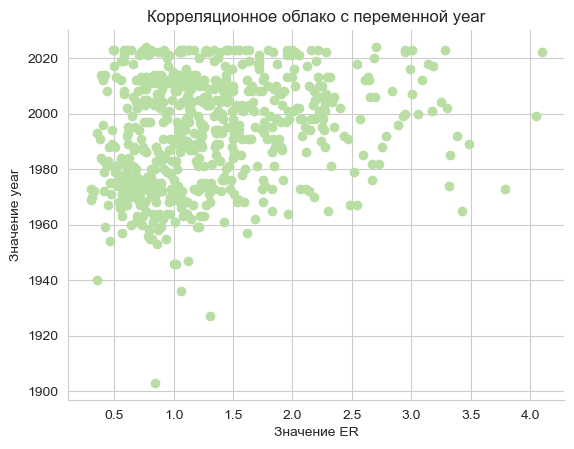

In [52]:
plt.scatter(movies['ER'], movies['year'], color = '#b8dea4')
plt.title('Корреляционное облако с переменной year')
plt.xlabel('Значение ER')
plt.ylabel(f'Значение year')
sns.despine(right=True, top=True)

Можно предположить нелинейную положительную зависимость между годом выпуска и соотношением реакций. Чем моложе фильм, тем, в общем случае, больше отношение реакций к просмотрам. Отметим также, что максимальное значение ER встречается у свежих фильмов - в районе 2020 и 2000 годов соответственно.

Обратим внимание и на остальные категориальные показатели. Связь можно увидеть со значением переменной attachments. Самые большие показатели реакций у постов с 9 приложениями. Однако это можно объяснить тем, что таких постов большинство в выборке. Значение переменной oscar_winner несильно влияет на ER. Это можно было бы также связать с тем, что таких постов меньшинство, однако переменная oscar_nominee показывает, что номинирование фильма на "Оскар" также не сильно оказывало влияния на значение переменной. Победа в "Золотой Пальмовой Ветви" также не сильно влияет на показатели.

Теперь рассмотрим влияние режиссера на реакцию аудитории. Выведем топ самых любимых режиссеров аудитории и сравним с самыми часто публикуемыми режиссерами.

In [53]:
ranked_directors = df3.groupby('director')['ER'].mean().reset_index()
ranked_directors = ranked_directors.sort_values(by='ER', ascending=False)
ranked_directors.head()

,director,ER
184,Кевин Смит,4.046874
134,Доменико Паолелла,3.789946
375,Уильям Уайлер,3.424901
155,Жан-Жак Анно,3.383801
58,Валериан Боровчик,3.318571


Теперь сравним с рейтингом самых публикуемых режиссеров.

In [54]:
publ_directors = df3['director'].value_counts().reset_index()
publ_directors.columns = ['director', 'count']
publ_directors = publ_directors.sort_values(by='count', ascending=False)
publ_directors.head()

,director,count
0,Стивен Содерберг,8
2,Брайан де Пальма,7
3,Мартин Скорсезе,7
1,Стивен Спилберг,7
4,Ридли Скотт,6


In [55]:
correlation_coefficient = publ_directors['count'].corr(ranked_directors['ER'])
correlation_coefficient

-0.016923387903094517

Как мы можем заметить, есть даже некоторая отрицательная корреляция, пусть и даже небольшая, что означает, что авторы паблика не обращают внимания на популярность режиссера среди аудитории, а ориентируются чисто на собственные предпочтения в выборе контента. Даже без последующих рассуждений очевидно, что, если авторы хотят увеличить степень вовлеченности аудитории, то им нужно переориентироваться на других режиссеров.

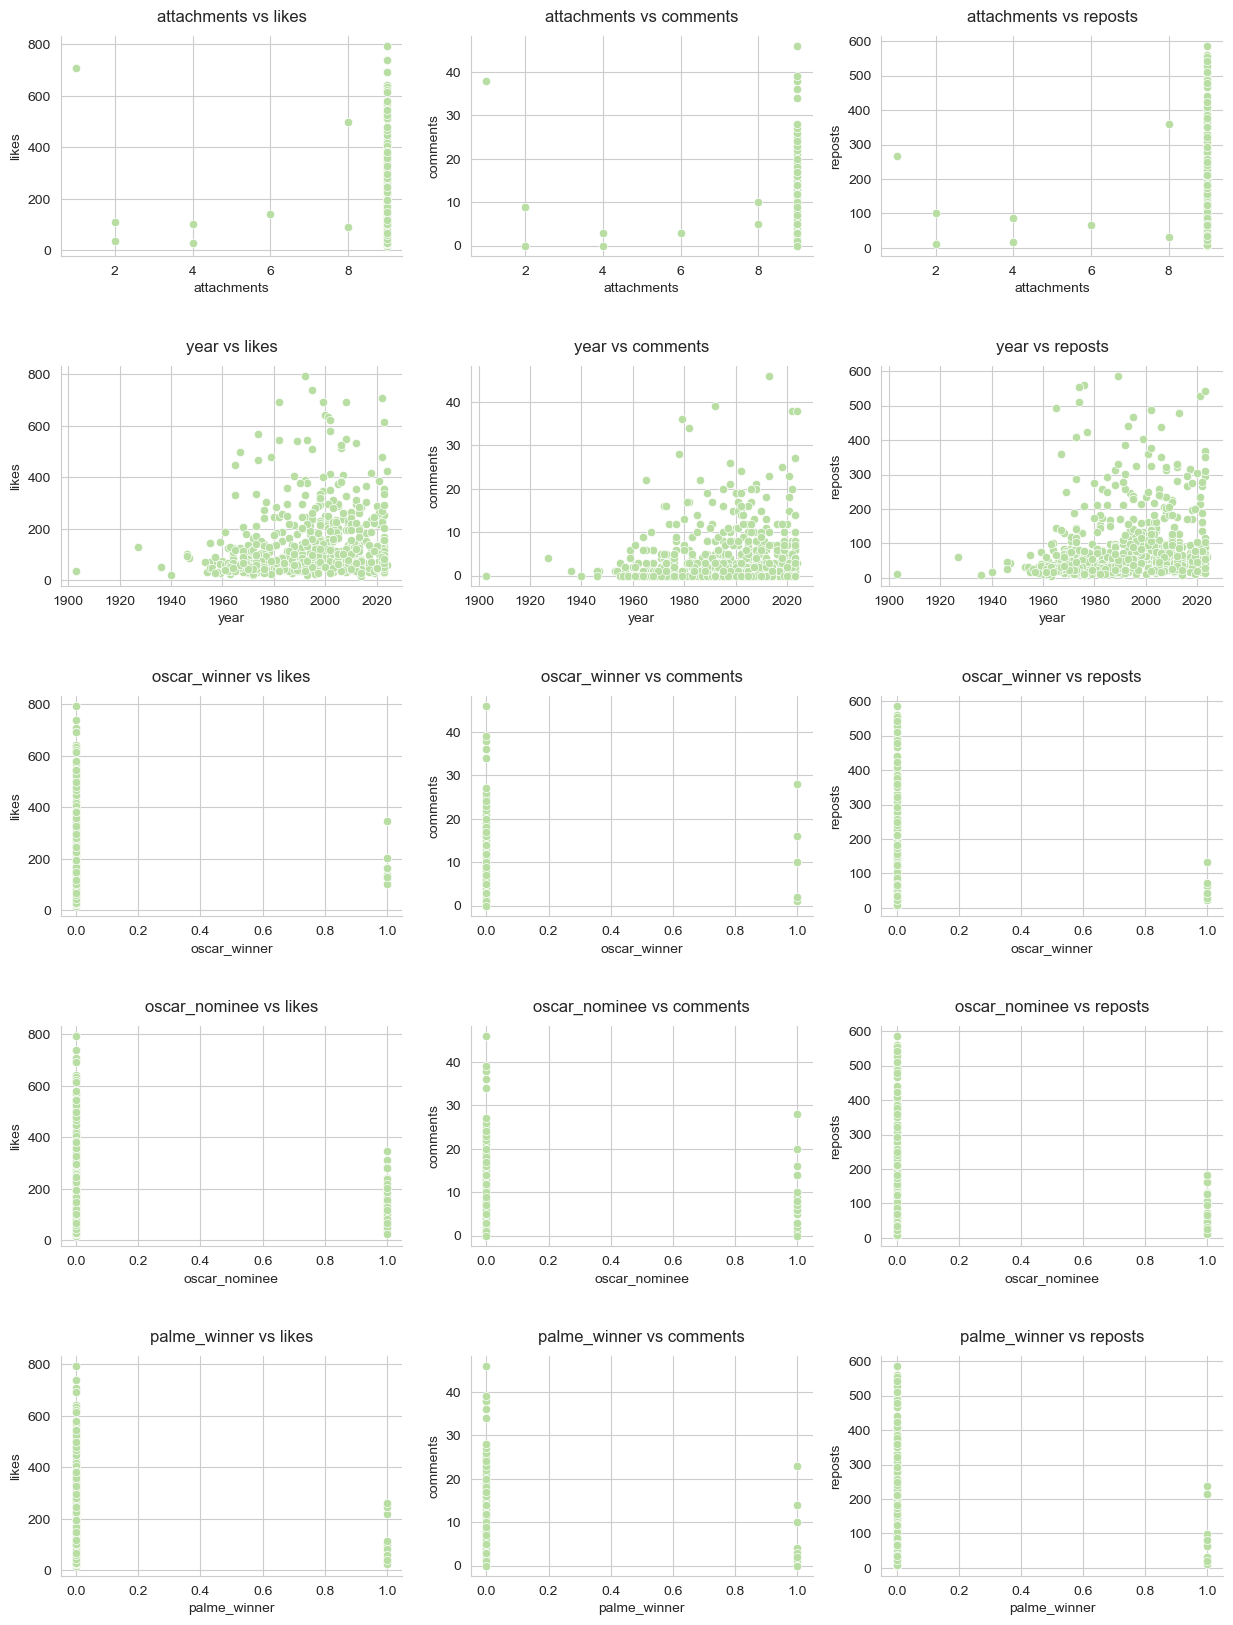

In [56]:
var_cat = ['attachments', 'year', 'oscar_winner', 'oscar_nominee', 'palme_winner']
predictors = ['likes', 'comments', 'reposts']

sns.set_style("whitegrid")
fig, axes = plt.subplots(len(var_cat), len(predictors), figsize=(15, 20))

for i, var in enumerate(var_cat):
    for j, pred in enumerate(predictors):
        sns.scatterplot(x=movies[var], y=movies[pred], ax=axes[i, j], color = '#b8dea4')
        axes[i, j].set_title(f'{var} vs {pred}', pad=10)
        axes[i, j].set_xlabel(var)
        axes[i, j].set_ylabel(pred)
        axes[i, j].grid(True)
        sns.despine(right=True, top=True)

plt.subplots_adjust(hspace=0.5)

plt.show()

Рассмотрение переменных по отдельности не дало нам новых инсайтов насчет закономерностей в данных, поскольку тенденции в каждой конкретной категории схожи с тем, что происходит при оценке ER.

Теперь проанализируем группу, в которой есть только картинки без упоминания фильмов.

In [57]:
visuals = df3[df3['movie_flg'] == 0]

Поскольку нам нужно понять, какие посты пользуются успехом, а практически все категории будут зависеть от наличия фильма в посте (например, номинация на оскар/другую награду/режиссер/год выпуска), то есть смысл просто посмотреть на меры центральной тенденции в двух категориях и понять, какая из них оказывается более популярной.

In [58]:
movies['ER'].mean()

1.3158980867768593

In [59]:
visuals['ER'].mean()

1.4701568351420486

In [60]:
movies['ER'].median()

1.142258265979525

In [61]:
visuals['ER'].median()

1.2587558567607369

In [62]:
movies['ER'].mode()

0    0.541196
1    1.110966
Name: ER, dtype: float64

In [63]:
visuals['ER'].mode()

0      0.239854
1      0.270369
2      0.320871
3      0.344432
4      0.355901
         ...   
309    3.722936
310    3.838507
311    3.842558
312    3.912756
313    4.482161
Name: ER, Length: 314, dtype: float64

In [22]:
movies['ER'].std()

0.6712150416984416

In [23]:
visuals['ER'].std()

0.7883749195434572

В ходе исследования второй группы постов, мы выяснили, что:


1.   В среднем аудитория на них более бурно реагирует: это видно из более высоких показателей и медианы, и среднего
2.   Если первая группа постов условно может делиться на "успешные" (которые находятся вокруг второй моды) и "провальные" (которые находятся вокруг первой моды), то вторая группа не может быть разделена на подгруппы вовсе, потому что ни одно значение показателя там не повторяется, и поэтому распределение не собирается вокруг какого-то популярного значения.
3.   Из-за этого мы еще и проверили стандартное отклонение: вторая группа постов в этом смысле более рискованная для публикации, потому что там стандартное отклонение выше.

Дополнительно мы провизуализировали распределение таргетной переменной для второй группы публикаций.

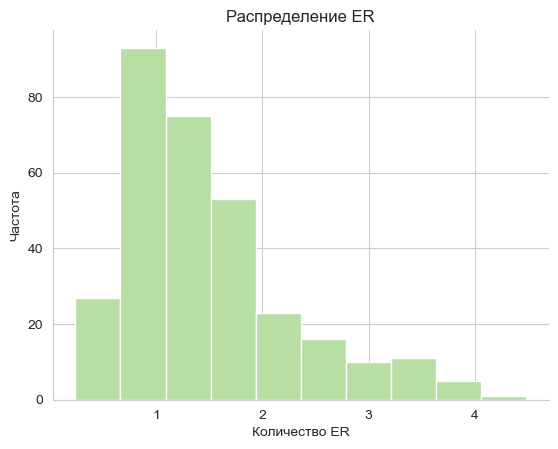

In [64]:
visuals['ER'].hist(color = '#b8dea4')
plt.title('Распределение ER')
plt.xlabel('Количество ER')
plt.ylabel('Частота')
sns.despine(right=True, top=True)


Сохраним полученные данные.

In [66]:
movies.to_csv('movies_dataset.csv', index=False)
visuals.to_csv('visuals_dataset.csv', index=False)
df3.to_csv('newfeatures_dataset.csv', index=False)